In [1]:
import pandas  as pd
import seaborn as sns
import numpy as np
from matplotlib       import pyplot          as plt




In [2]:
#read data into a pandas DataFrame
df_raw=pd.read_csv(r'F:\fraudd\data.csv' ,low_memory=True)

In [3]:
# a concise summary of the DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


In [4]:
# to create a deep copy of a DataFrame
df_dd=df_raw.copy()

Data description module

In [5]:
#display the first few rows of a DataFrame
df_dd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [6]:
#Counting no. of rows and columns
print("Number of rows: {}".format(df_dd.shape[0]))
print("Number of columns: {}".format(df_dd.shape[1]))

Number of rows: 636262
Number of columns: 11


In [7]:
#data types of each columns
df_dd.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Check Null values

In [8]:
#Checking number of values 
df_dd.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Calculating mean,median,mode,standard deviation,minimum and maximum values

In [9]:

# Calculate the summary statistics using describe()
summary = df_dd.describe()

# Access specific statistics from the summary_stats DataFrame
count_values = summary.loc['count']
mean_values = summary.loc['mean']
std_values = summary.loc['std']
min_values = summary.loc['min']
median_values = summary.loc['50%']
max_values = summary.loc['max']

# Calculate the range separately
range_values = max_values - min_values

# Print the results
print("Count:")
print(count_values)

print("\nMean:")
print(mean_values)

print("\nStandard Deviation:")
print(std_values)

print("\nMinimum:")
print(min_values)

print("\nMedian ")
print(median_values)


print("\nMaximum:")
print(max_values)

print("\nRange:")
print(range_values)




Count:
step              636262.0
amount            636262.0
oldbalanceOrg     636262.0
newbalanceOrig    636262.0
oldbalanceDest    636262.0
newbalanceDest    636262.0
isFraud           636262.0
isFlaggedFraud    636262.0
Name: count, dtype: float64

Mean:
step              2.429319e+02
amount            1.800585e+05
oldbalanceOrg     8.317937e+05
newbalanceOrig    8.528354e+05
oldbalanceDest    1.096212e+06
newbalanceDest    1.221809e+06
isFraud           1.290349e-03
isFlaggedFraud    3.143359e-06
Name: mean, dtype: float64

Standard Deviation:
step              1.423309e+02
amount            6.069714e+05
oldbalanceOrg     2.885636e+06
newbalanceOrig    2.921296e+06
oldbalanceDest    3.375389e+06
newbalanceDest    3.656213e+06
isFraud           3.589827e-02
isFlaggedFraud    1.772951e-03
Name: std, dtype: float64

Minimum:
step              1.0
amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlagge

Categorical Description

In [10]:
categorical_attributes=df_dd.select_dtypes(exclude=['int64','float64'])


In [11]:
categorical_attributes.describe()

,type,nameOrig,nameDest
count,636262,636262,636262
unique,5,636171,457224
top,CASH_OUT,C334643493,C2083562754
freq,224216,2,14


In [12]:
#Converting values which are not 0 and 1
def convert(value):
    if value == 1:
        return 1
    else:
        return 0

# Apply the function to the 'isFraud' and 'isFlaggedFraud' columns
ctc = ['isFraud', 'isFlaggedFraud']
df_dd[ctc] = df_dd[ctc].applymap(convert)

Plotting the spread of data using box plot graph

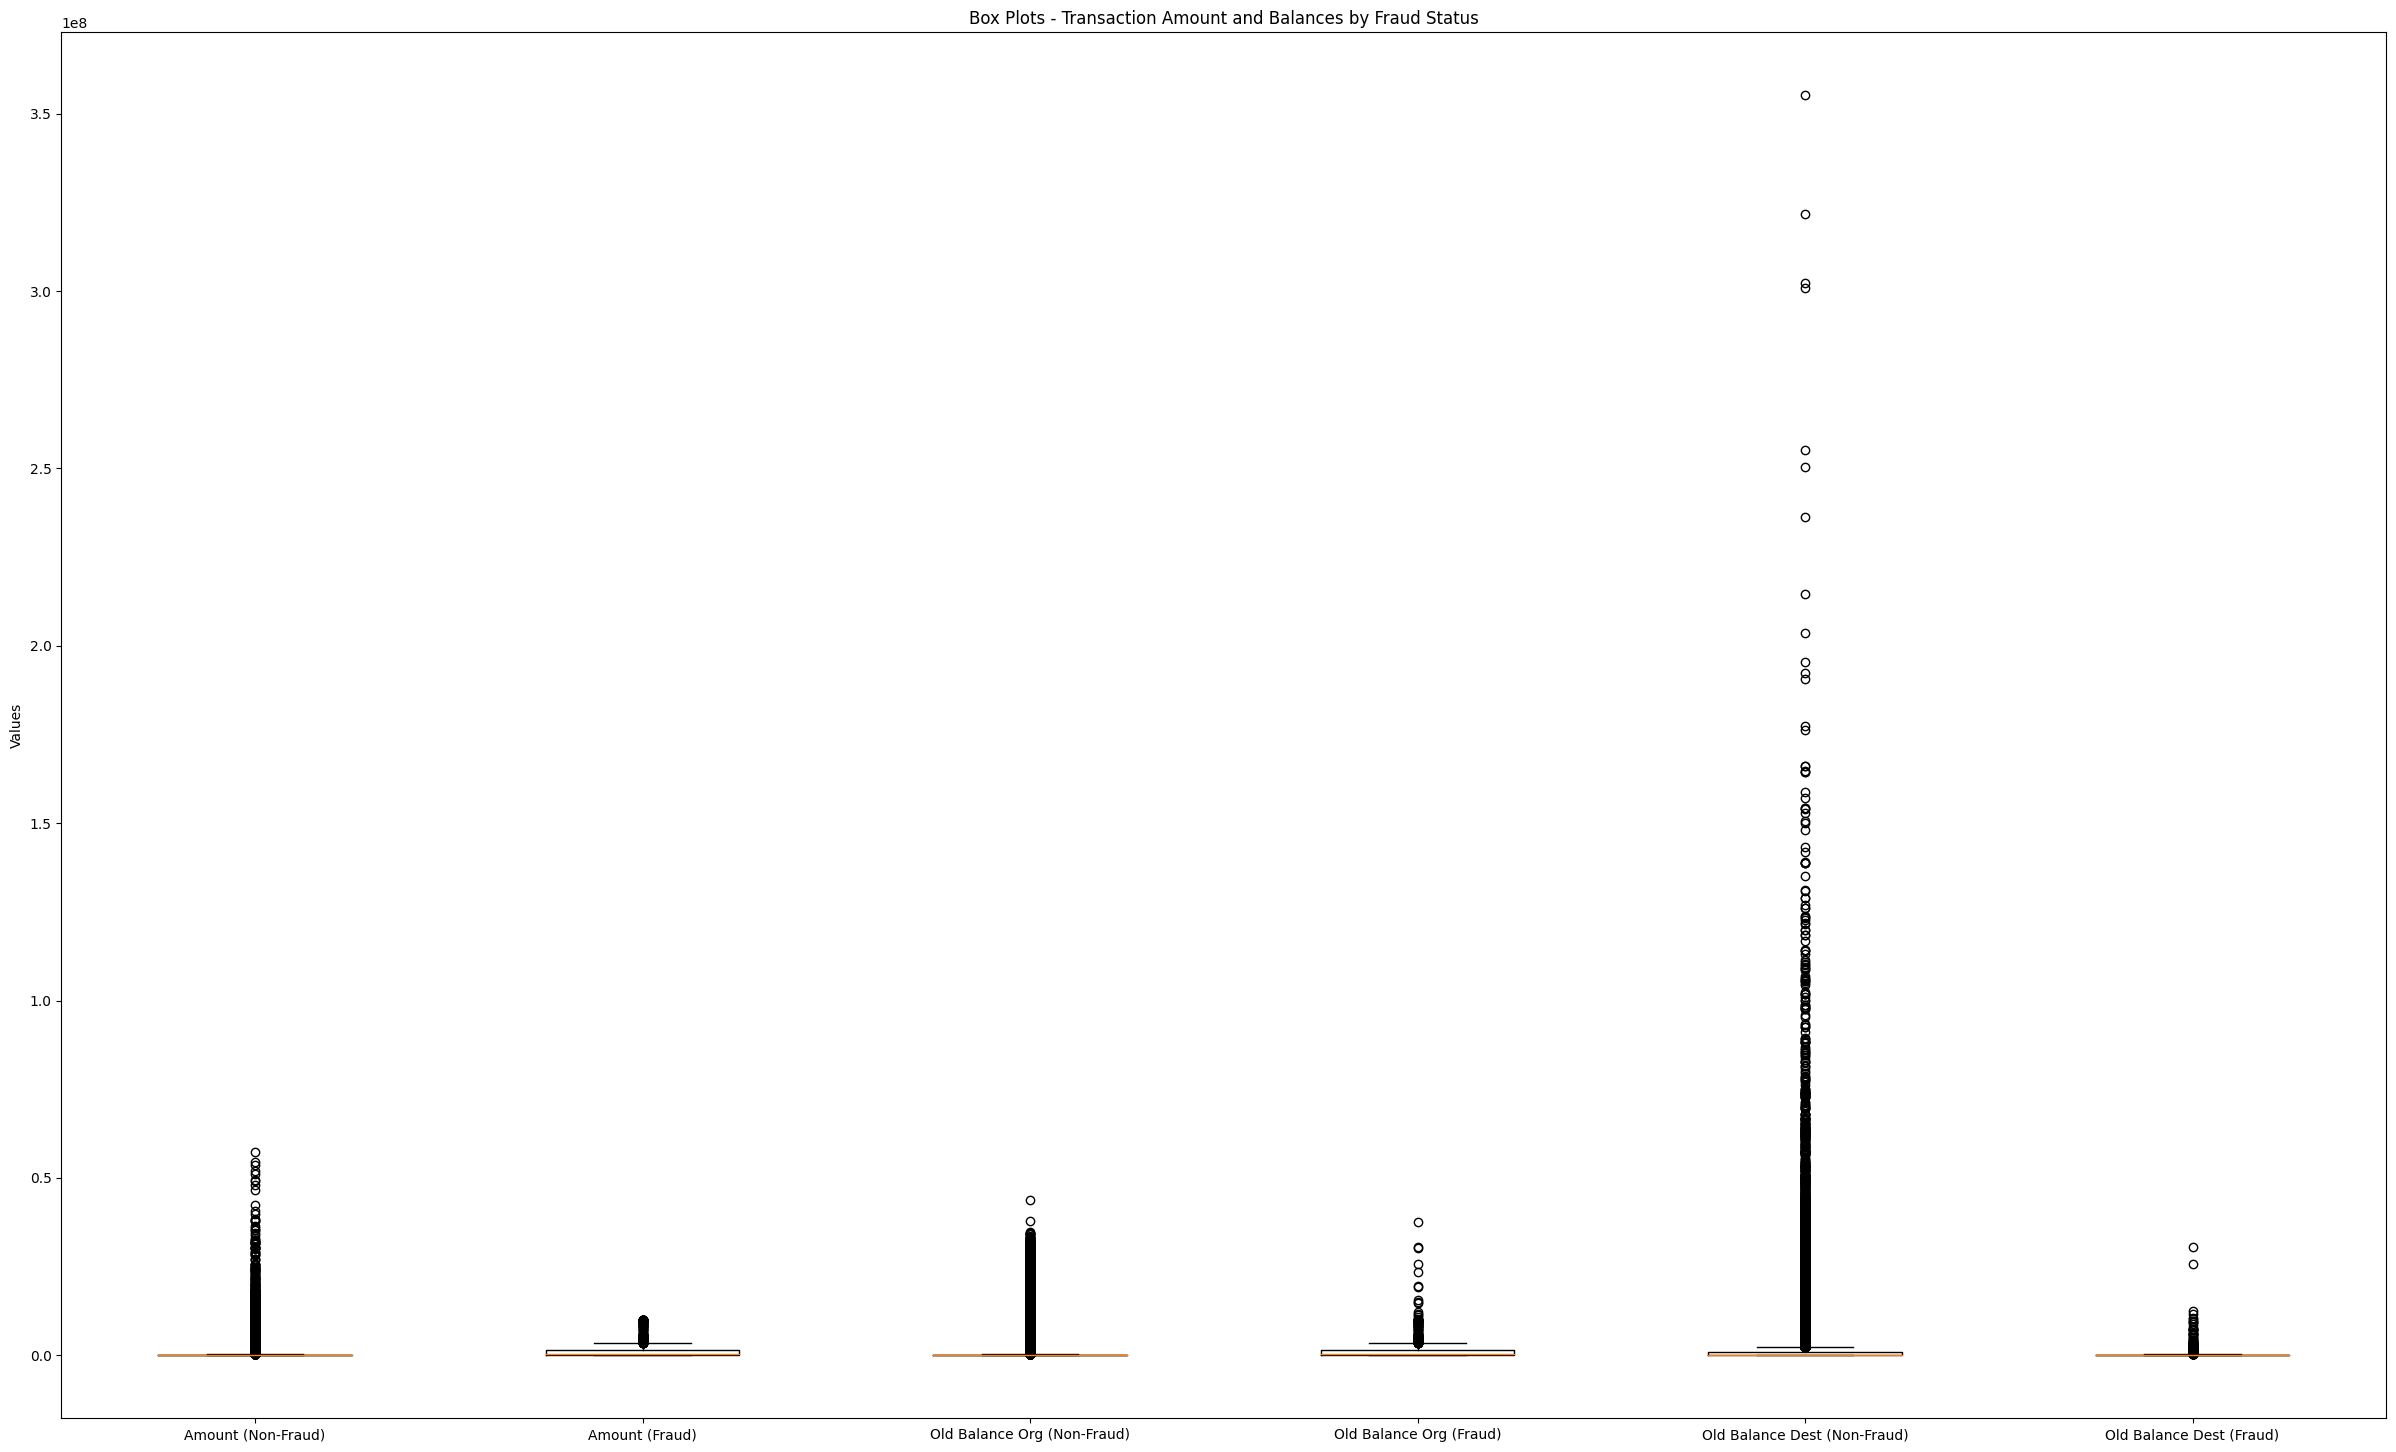

In [13]:
df = df_dd

# Separate data into two groups: Fraudulent and Non-Fraudulent transactions
fraud_data = df[df['isFraud'] == 1][['amount', 'oldbalanceOrg', 'oldbalanceDest']]
non_fraud_data = df[df['isFraud'] == 0][['amount', 'oldbalanceOrg', 'oldbalanceDest']]

# Create a list of data for the box plot
plot = [non_fraud_data['amount'], fraud_data['amount'],
                non_fraud_data['oldbalanceOrg'], fraud_data['oldbalanceOrg'],
                non_fraud_data['oldbalanceDest'], fraud_data['oldbalanceDest']]

# Box plot
plt.figure(figsize=(30, 18))
plt.boxplot(plot, labels=['Amount (Non-Fraud)', 'Amount (Fraud)',
                                  'Old Balance Org (Non-Fraud)', 'Old Balance Org (Fraud)',
                                  'Old Balance Dest (Non-Fraud)', 'Old Balance Dest (Fraud)'])
plt.title('Box Plots - Transaction Amount and Balances by Fraud Status')
plt.ylabel('Values')
plt.show()
#Below is the box plot of the data



In [14]:
#Creating a sample of data about some% of data as the data is too large

# Create a random sample of 60000 of the data
sampled = df_dd.sample(n=60000, random_state=42)


# Displaying the first few rows of the sampled DataFrame
print(sampled)


        step      type      amount     nameOrig  oldbalanceOrg  \
492123    37  CASH_OUT   267289.58   C224115260      397858.58   
370792   234   PAYMENT    52457.64   C952073038           0.00   
435806   687   PAYMENT    35944.26  C1418389379           0.00   
195013   132  CASH_OUT   152038.27  C1724100314           0.00   
388753   349  CASH_OUT   200053.40  C1488617727           0.00   
...      ...       ...         ...          ...            ...   
480866   211   PAYMENT     5902.27  C1811039167       11114.00   
492257   322   CASH_IN    32221.54  C1717252144       30024.00   
476224   167   PAYMENT     1905.50   C785497544        6608.00   
597382   279  CASH_OUT      255.65   C426170632       19719.00   
408993   183  TRANSFER  1017158.83   C145709576      119592.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
492123       130569.00  C2100559328      3664138.94      3931428.53        0   
370792            0.00   M763062534            

BAR PLOT

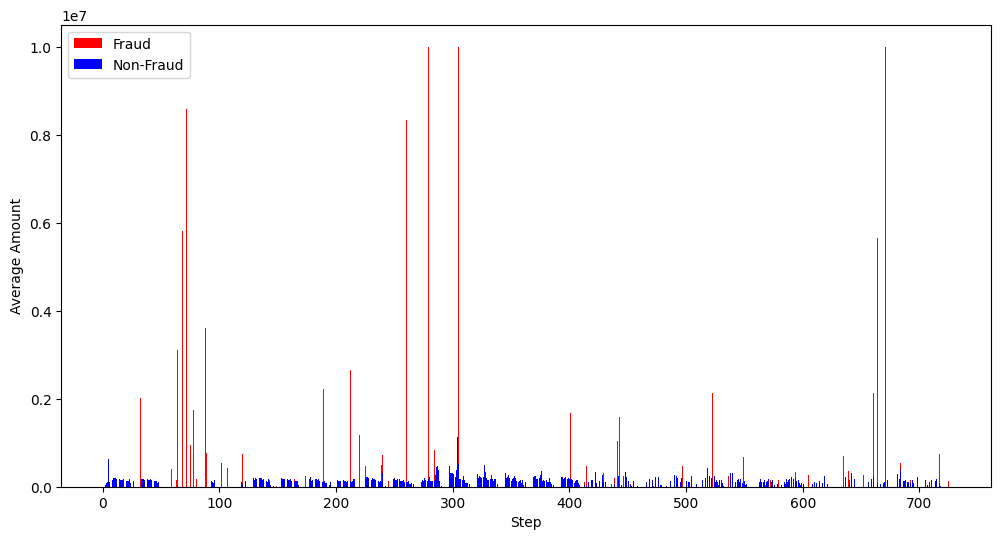

In [15]:

# Group the data by 'step' and 'isFraud' and calculate the average amount for each group
group_data = sampled.groupby(['step', 'isFraud'])['amount'].mean().reset_index()

# Separate data for fraudulent and non-fraudulent transactions
fraud = group_data[group_data['isFraud'] == 1]
non_fraud = group_data[group_data['isFraud'] == 0]

#Bar chart
plt.figure(figsize=(12, 6))
plt.bar(fraud['step'], fraud['amount'], color='red', label='Fraud')
plt.bar(non_fraud['step'], non_fraud['amount'], color='blue', label='Non-Fraud')
plt.xlabel('Step')
plt.ylabel('Average Amount')
plt.legend()
plt.show()


SCATTER PLOT

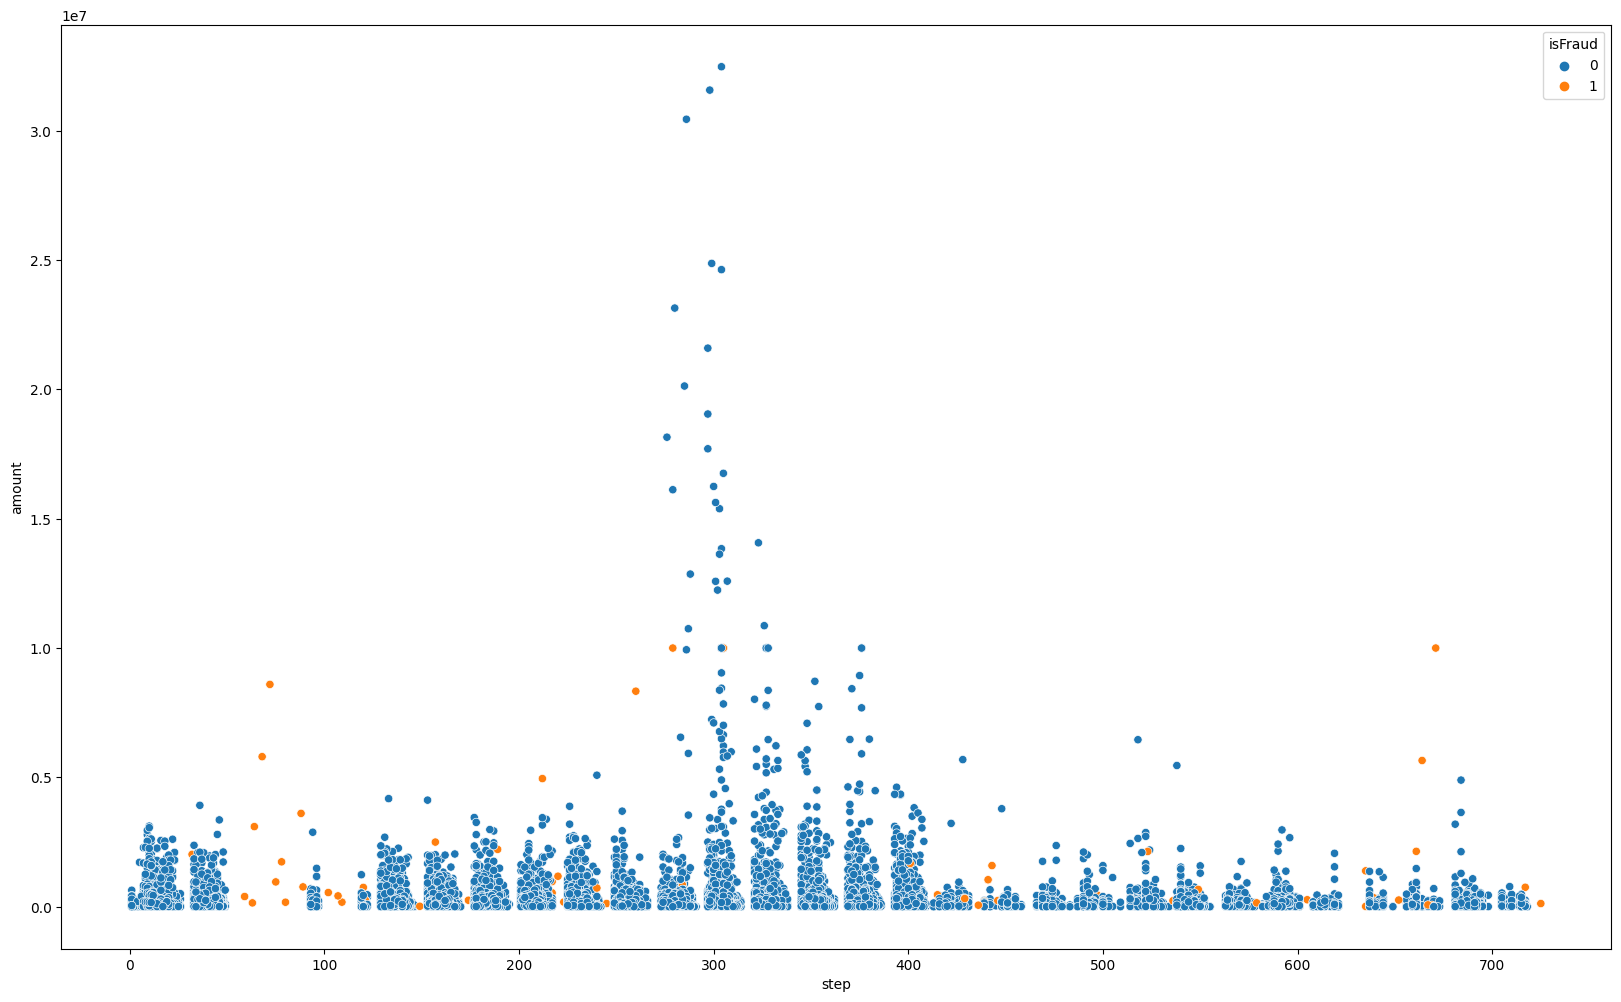

In [16]:


# Create the scatter plot
plt.figure(figsize=(20, 12))
sns.scatterplot(x='step',y='amount',hue='isFraud',data=sampled);
plt.show()


In [17]:
fraud=sampled[sampled['isFraud']==1]

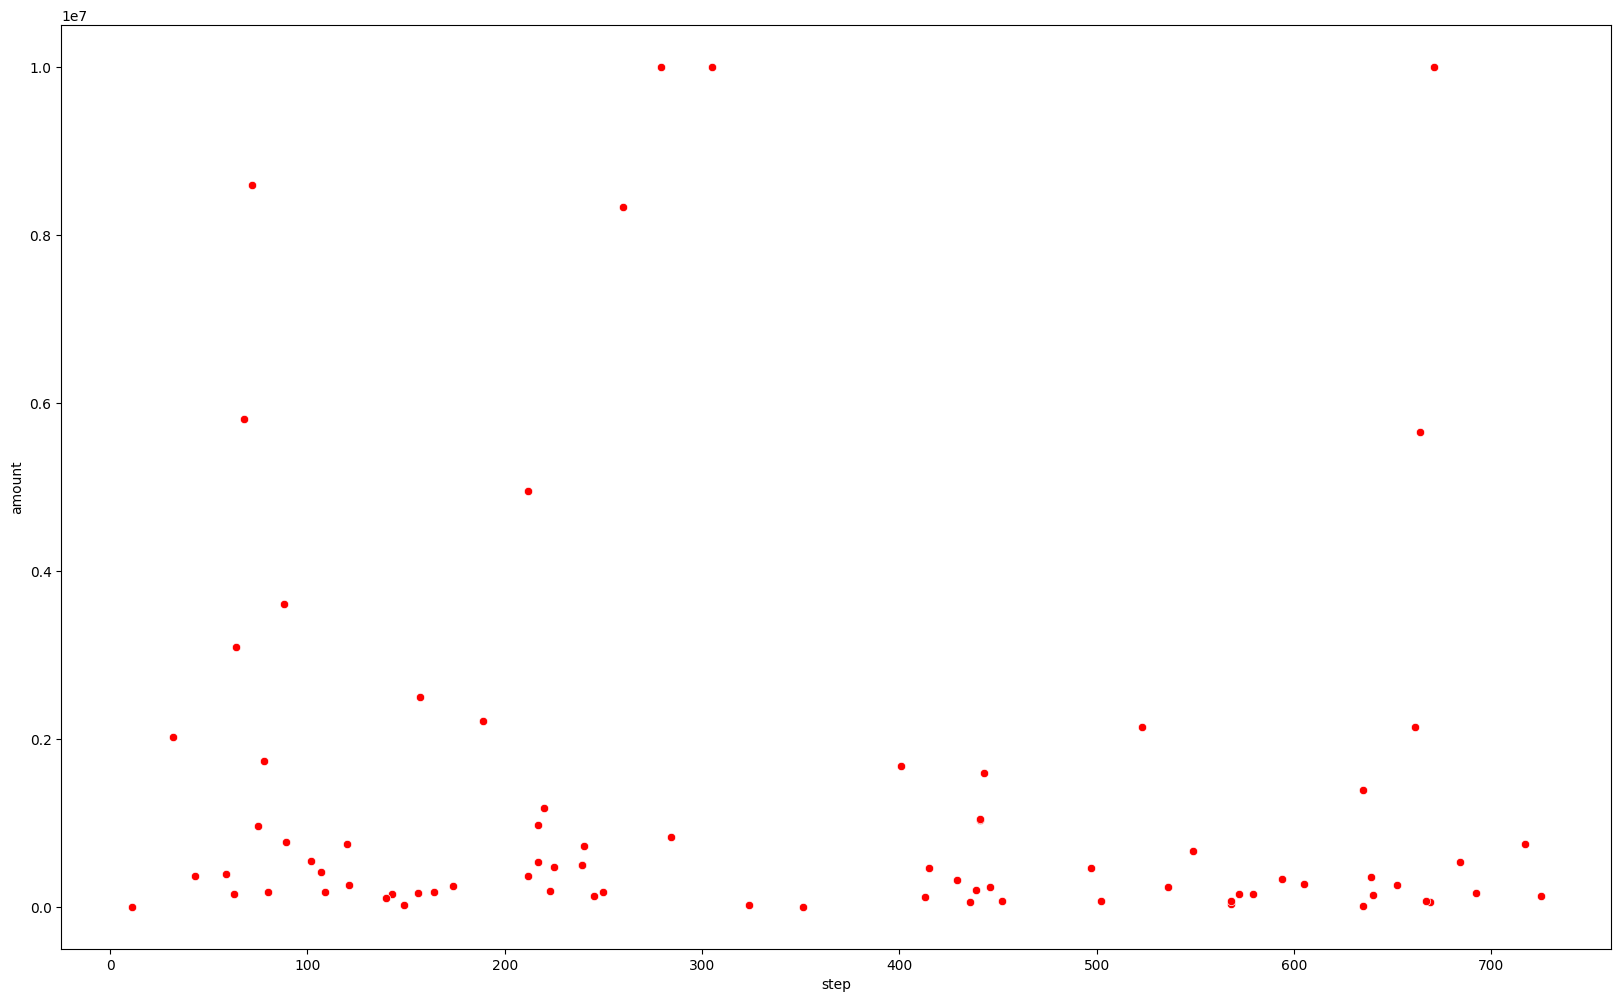

In [18]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='step',y='amount',data=fraud,color='red');

PIE CHART

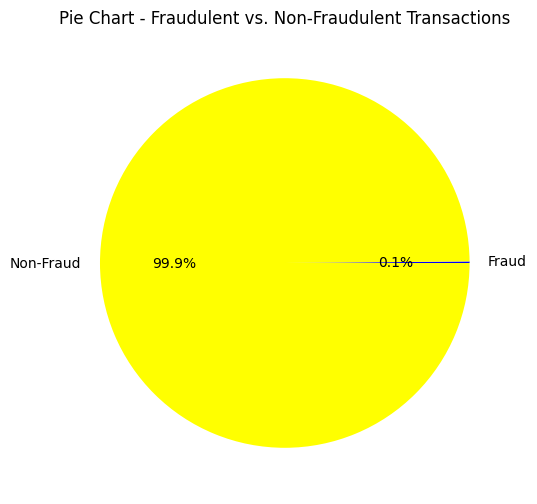

In [19]:

fcount = sampled['isFraud'].sum()
nfcount = len(sampled) - fcount

# Create the pie chart
labels = ['Fraud', 'Non-Fraud']
sizes = [fcount, nfcount]
colors = ['blue', 'yellow']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Pie Chart - Fraudulent vs. Non-Fraudulent Transactions')
plt.show()


Output obtained from all the above charts 


The sampled data contains 99.9% Non Fraud and a 0.1% Fraud. 